<a href="https://colab.research.google.com/github/Lovanlong1210/FIT407_java-OOP/blob/main/CNTT17_01_L%C3%B2_V%C4%83n_Long_BKT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 1️ Đọc file Excel
file_path = "/content/CNTT17-01_Lò Văn Long_BKT2.xlsx"  # Thay bằng tên file của bạn
df = pd.read_excel(file_path)
print(df.head(16))

# 2️⃣Xử lý dữ liệu bị thiếu
df["Tên sản phẩm"].fillna("Không xác định", inplace=True)
df["Loại sản phẩm"].fillna("Không rõ", inplace=True)
df["Khách hàng"].fillna("Khách lẻ", inplace=True)

df["Số lượng bán"].fillna(1, inplace=True)  # Mặc định 1 nếu thiếu
df["Giá bán (VND)"] = df["Giá bán (VND)"].astype(str).str.replace(",", "").astype(float)  # Chuẩn hóa số
df["Giá bán (VND)"].fillna(df["Giá bán (VND)"].median(), inplace=True)

# 3 Xử lý ngày tháng
df["Ngày bán"] = pd.to_datetime(df["Ngày bán"], errors="coerce")
df["Ngày bán"].fillna(method="ffill", inplace=True)  # Điền ngày trước đó



# 4 Xử lý dữ liệu trùng lặp
df.drop_duplicates(inplace=True)

# 5 Lưu lại file Excel đã làm sạch
df.to_excel("CNTT17-01_Lò Văn Long_BKT2_cleaned.xlsx", index=False)

print("✔ Dữ liệu đã được làm sạch và lưu vào 'CNTT17-01_Lò Văn Long_BKT2_cleaned.xlsx'")


   Mã sản phẩm  Tên sản phẩm Loại sản phẩm  Số lượng bán Giá bán (VND)  \
0            1      Laptop A       Điện tử             5    15,000,000   
1            2     Áo thun B       Quần áo            10           200   
2            3  Điện thoại C       Điện tử             3     7,000,000   
3            4        Giày D      Giày dép             8           500   

    Ngày bán    Khách hàng Nhân viên bán hàng  
0 2023-10-01  Nguyễn Văn A        Nhân viên X  
1 2023-10-02    Trần Thị B        Nhân viên Y  
2 2023-10-03      Lê Văn C        Nhân viên Z  
3 2023-10-04    Phạm Thị D        Nhân viên X  
✔ Dữ liệu đã được làm sạch và lưu vào 'CNTT17-01_Lò Văn Long_BKT2_cleaned.xlsx'


<ipython-input-14-4157c11fdafd>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Tên sản phẩm"].fillna("Không xác định", inplace=True)
<ipython-input-14-4157c11fdafd>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

📌 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Mã sản phẩm         4 non-null      int64         
 1   Tên sản phẩm        4 non-null      object        
 2   Loại sản phẩm       4 non-null      object        
 3   Số lượng bán        4 non-null      int64         
 4   Giá bán (VND)       4 non-null      int64         
 5   Ngày bán            4 non-null      datetime64[ns]
 6   Khách hàng          4 non-null      object        
 7   Nhân viên bán hàng  4 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 388.0+ bytes
None

📌 Thống kê mô tả dữ liệu số:
       Mã sản phẩm  Số lượng bán  Giá bán (VND)             Ngày bán
count     4.000000      4.000000   4.000000e+00                    4
mean      2.500000      6.500000   5.500175e+06  2023-10-02 12:00:00
min

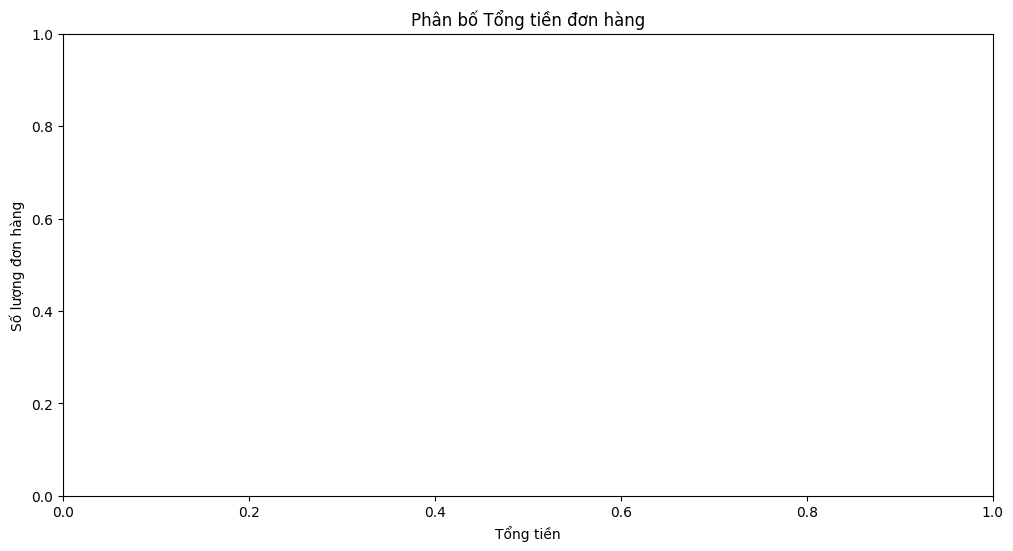

<ipython-input-7-796ed058bcb2>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_san_pham.values, y=top_san_pham.index, palette="viridis")


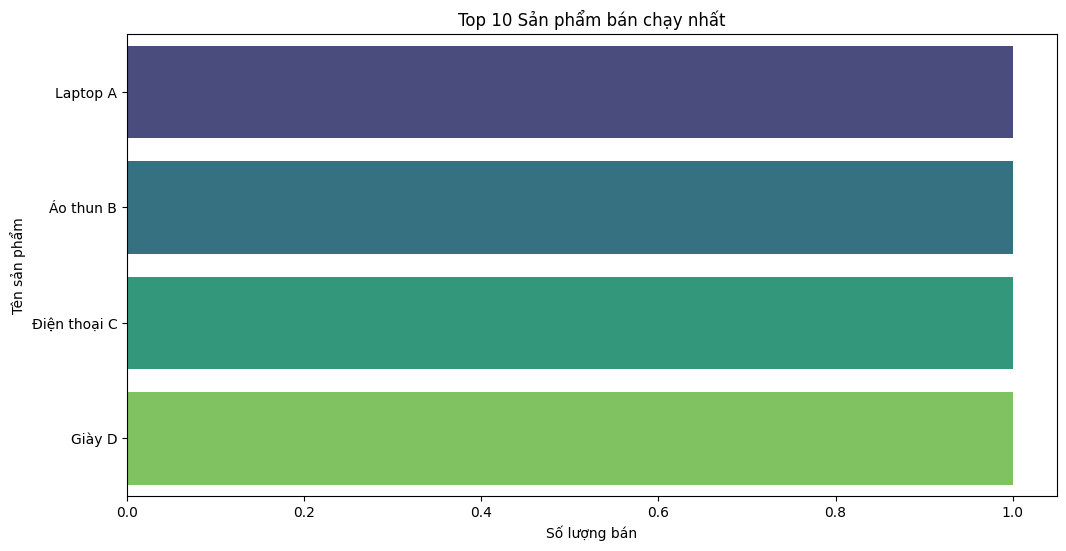

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Đọc file Excel sau khi làm sạch
df = pd.read_excel("/content/CNTT17-01_Lò Văn Long_BKT2_cleaned.xlsx")

# 2️ Hiển thị thông tin tổng quát về dữ liệu
print("📌 Thông tin dữ liệu:")
print(df.info())  # Kiểm tra kiểu dữ liệu và dữ liệu bị thiếu

print("\n📌 Thống kê mô tả dữ liệu số:")
print(df.describe())  # Thống kê dữ liệu số

# 3️ Kiểm tra dữ liệu bị thiếu
print("\n📌 Số lượng dữ liệu thiếu mỗi cột:")
print(df.isnull().sum())

# 4️ Phân tích dữ liệu bán hàng
plt.figure(figsize=(12, 6))

plt.title("Phân bố Tổng tiền đơn hàng")
plt.xlabel("Tổng tiền")
plt.ylabel("Số lượng đơn hàng")
plt.show()

# 5️ Biểu đồ Top 10 sản phẩm bán chạy nhất
top_san_pham = df["Tên sản phẩm"].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_san_pham.values, y=top_san_pham.index, palette="viridis")
plt.title("Top 10 Sản phẩm bán chạy nhất")
plt.xlabel("Số lượng bán")
plt.ylabel("Tên sản phẩm")
plt.show()




Phương trình hồi quy: y = 16034332.76 + -1620639.66x
Hệ số chặn (beta_0): 16034332.758620694
Hệ số dốc (beta_1): -1620639.6551724144
Hệ số xác định (R^2): 0.49785325001462843
Sai số bình phương trung bình (MSE): 19206146575474.137


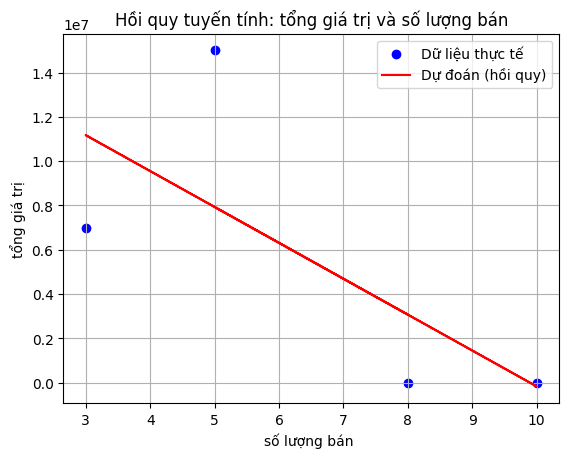

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(df)

# Tách biến độc lập (X) và phụ thuộc (y)
X = df["Số lượng bán"].values.reshape(-1, 1)
y = df["Giá bán (VND)"].values

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Dự đoán giá trị
y_pred = model.predict(X)

# Tính toán các hệ số hồi quy
beta_0 = model.intercept_  # Hệ số chặn
beta_1 = model.coef_[0]    # Hệ số dốc

# Đánh giá mô hình
r2 = r2_score(y, y_pred)  # Hệ số xác định R^2
mse = mean_squared_error(y, y_pred)  # Sai số bình phương trung bình (MSE)

# Hiển thị kết quả
print(f"Phương trình hồi quy: y = {beta_0:.2f} + {beta_1:.2f}x")
print(f"Hệ số chặn (beta_0): {beta_0}")
print(f"Hệ số dốc (beta_1): {beta_1}")
print(f"Hệ số xác định (R^2): {r2}")
print(f"Sai số bình phương trung bình (MSE): {mse}")

# Vẽ biểu đồ
plt.scatter(X, y, color="blue", label="Dữ liệu thực tế")
plt.plot(X, y_pred, color="red", label="Dự đoán (hồi quy)")
plt.title("Hồi quy tuyến tính: tổng giá trị và số lượng bán")
plt.xlabel("số lượng bán ")
plt.ylabel("tổng giá trị")
plt.legend()
plt.grid(True)
plt.show()